In [52]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from numpy import dot
from numpy.linalg import norm

In [53]:
def cos_sim(a: np.array, b: np.array) -> float:
    return dot(a, b)/(norm(a)*norm(b))

In [4]:
vgg = scipy.io.loadmat('bestofgiro2022_vggfeatures.mat')["features"]
skeletons = scipy.io.loadmat('bestofgiro2022_skeletons.mat')["skeldata"]
clip = scipy.io.loadmat('bestofgiro2022_clipfeatures.mat')["features"]

# VGG features

In [8]:
print(f"There are {vgg.shape[1]} image vectors of size {vgg.shape[0]}")

There are 13971 image vectors of size 512


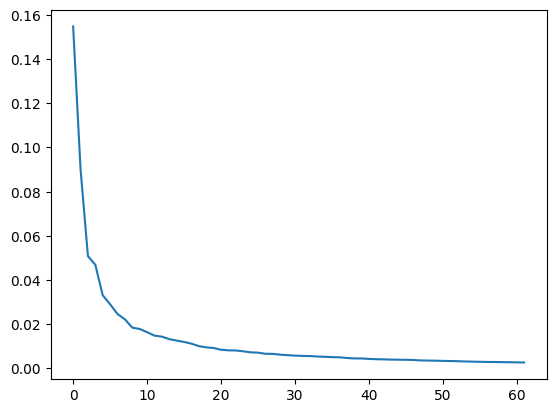

In [28]:
pca = PCA(n_components=0.8, svd_solver='full')
pca.fit(vgg.T)

plt.plot(pca.explained_variance_ratio_)
plt.show()

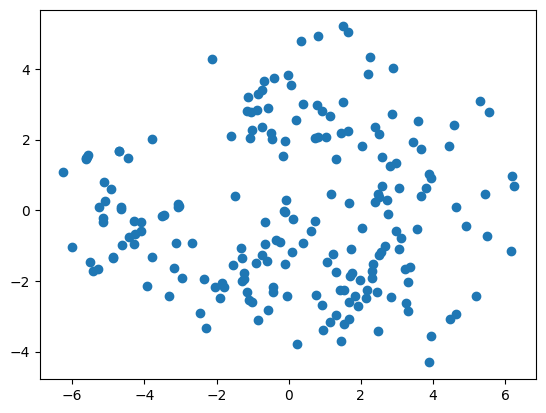

In [45]:
pca = PCA(n_components=2, svd_solver='full')
vgg_2comp = pca.fit_transform(vgg.T)
index = np.random.choice(vgg_2comp.shape[0], 200, replace=False)
plt.scatter(x=vgg_2comp[index,0], y=vgg_2comp[index,1])
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


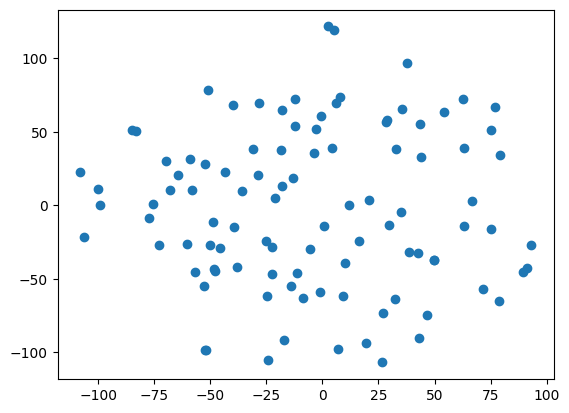

In [46]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000, init="pca", learning_rate="auto")
tsne_results = tsne.fit_transform(vgg.T)
index = np.random.choice(tsne_results.shape[0], 100, replace=False)
plt.scatter(x=tsne_results[index,0], y=tsne_results[index,1])
plt.show()

## The first few images should be able to form "clusters"

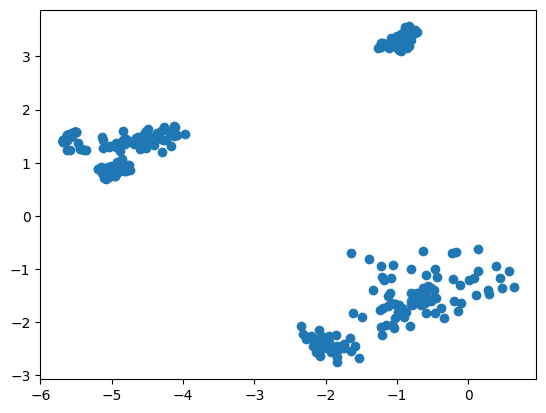

In [65]:
pca = PCA(n_components=2, svd_solver='full')
vgg_2comp = pca.fit_transform(vgg.T)
plt.scatter(x=vgg_2comp[:400,0], y=vgg_2comp[:400,1])
plt.show()

/opt/homebrew/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


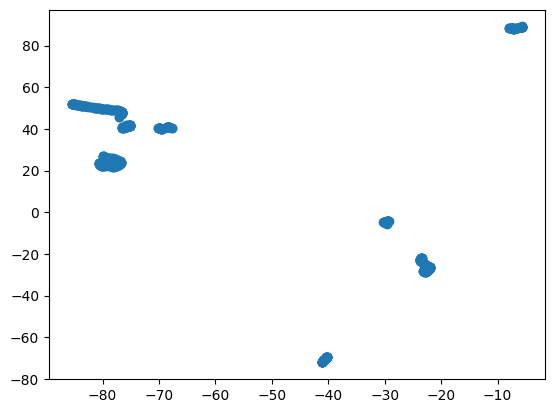

In [61]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000, init="pca", learning_rate="auto")
tsne_results = tsne.fit_transform(vgg.T)
plt.scatter(x=tsne_results[:400,0], y=tsne_results[:400,1])
plt.show()

## How often do scenes change?

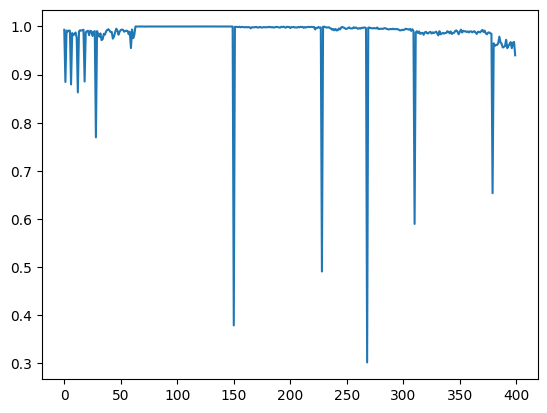

In [68]:
sim_scores = []

for i in range(400):
    sim = cos_sim(vgg.T[i], vgg.T[i+1])
    sim_scores.append(sim)

plt.plot(sim_scores)
plt.show()

# Skeletons

In [79]:
skeletons

array([[0.00000000e+00, 0.00000000e+00, 1.63000000e+02, ...,
        1.38200000e+04, 1.38200000e+04, 1.38200000e+04],
       [0.00000000e+00, 0.00000000e+00, 4.29812347e+02, ...,
        2.70253113e+02, 2.97462616e+02, 3.80876770e+02],
       [0.00000000e+00, 0.00000000e+00, 1.85498398e+02, ...,
        4.73273544e+01, 1.15440277e+02, 8.03681030e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.42769714e+02, ...,
        2.74482635e+02, 2.82593658e+02, 4.03746368e+02],
       [0.00000000e+00, 0.00000000e+00, 1.48617966e+02, ...,
        8.01726837e+01, 2.99943085e+02, 1.59247894e+02],
       [0.00000000e+00, 0.00000000e+00, 6.20650873e-02, ...,
        9.50773340e-03, 2.68178005e-02, 5.22439927e-02]])